# Airline Analysis

In this project, wl'll imagine that we work for a travel agency and need to know the ins and outs of airline prices for our clients. We want to make sure that we can find the best deal for our clients and help them to understand how airline prices change based on different factors.

We decide to look into our favorite airline. The data includes:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Univariate Analysis 

What do coach ticked prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
#Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

In [3]:
#Loading data
flight = pd.read_csv('flight.csv')
print(flight.head())
print(flight.info())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entri

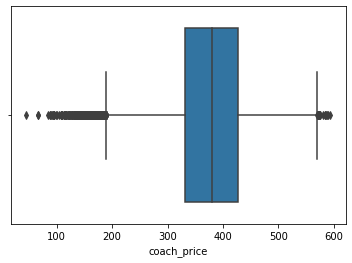

In [4]:
sns.boxplot(x = 'coach_price', data=flight)
plt.show()

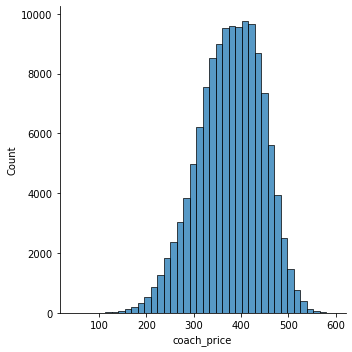

In [5]:
plt.clf()
sns.displot(flight.coach_price, bins = 40, kde=False)
plt.show()

**Results:**
- The average price for a coach ticket is 400 dollars 
- The lowest it goes is for 100 dollars and the highest is 600 dollars
- A 500 dollar ticket is above average

**8-hour long flights**

Now let's visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [6]:
hour_8_flights = flight['coach_price'][flight['hours'] == 8]
print(hour_8_flights)

75        416.320
81        474.350
111       407.125
290       432.905
295       406.565
           ...   
129666    372.655
129713    495.390
129727    486.165
129760    406.550
129771    355.510
Name: coach_price, Length: 2634, dtype: float64


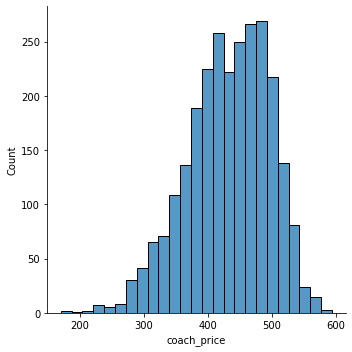

In [7]:
plt.clf()
sns.boxplot(x = hour_8_flights)
sns.displot(hour_8_flights, bins = 25, kde=False)

plt.show()

**Results:**
- the average price is in the 450 dollars
- The lowest it goes is for 150 dollars and the max is still around 600 dollars but now they are not outliers but inside the whiskers
- Now a 500 dollars ticket seems more comprehensive than in the previous analysis

**Flight Delays**

How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. We want to better understand how often there are large delays so we can correctly set up connecting flights. What kinds of delays are typical?

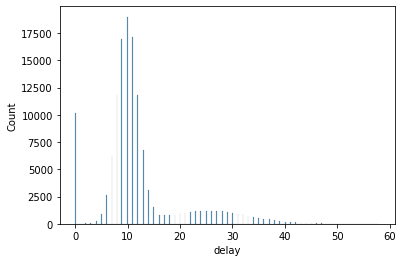

In [8]:


plt.clf()
sns.histplot(flight.delay[flight.delay <=500])
plt.show()

**Results:**
The delay distribution average is 10 minutes for flight. 

## Bivariate Analysis 

**Coach vs. First Class Prices**

Let's create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

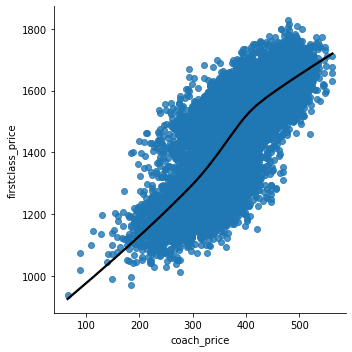

In [9]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()

**Results:**
Usually when a coach price is high, the first class price will also be higher. There is a positive correlation between coach prices and first class prices.

**Coach prices vs. Inflight features**

What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price? 

In [10]:
wifi_price = flight.coach_price[flight.inflight_wifi == 'Yes']
entertainment_price = flight.coach_price[flight.inflight_entertainment == 'Yes']
meal_price = flight.coach_price[flight.inflight_meal == 'Yes']

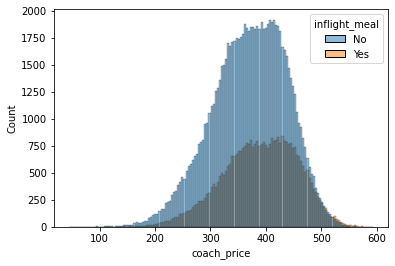

In [11]:
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, alpha = 0.5)
plt.show()

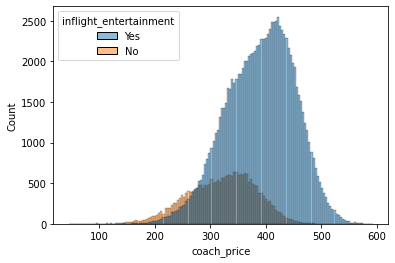

In [12]:
# Inflight Entertainment 
plt.clf()
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment, alpha = 0.5)
plt.show()

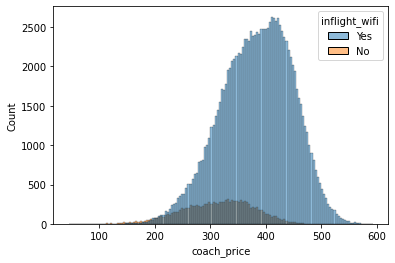

In [13]:
# Inflight Wi-Fi
plt.clf()
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi, alpha = 0.5)
plt.show()

**Results:**

In `inflight_meal` there are more flights with no meal than flights with meal, but the prices stay in the same distribution. For the `inflight_entertainment` prices were a bit higher if it has it, same for `inflight_wifi`.

**Number of Passengers vs. Length of Flights**

How does the number of passengers change in relation to the length of flights?

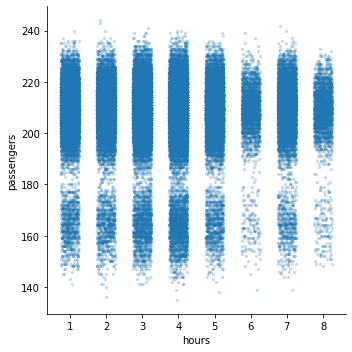

In [18]:
sns.lmplot(x = "hours", y = "passengers", data = flight, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

**Results:**

The number of passengers is distributed between 190 & 230 passengers on average between the hours 1 to 5. From 6 to 8 hours that distribution lowers. 

## Multivariate Analysis

**Coach vs. First Class on Weekends & Weekdays**

Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

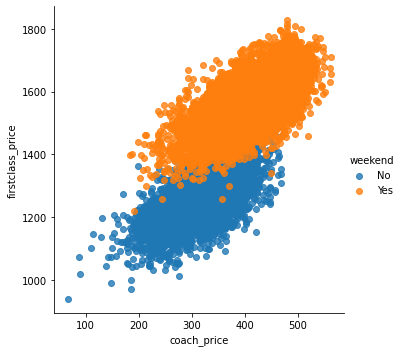

In [19]:
sns.lmplot(x ='coach_price', y='firstclass_price', hue = 'weekend', data = flight_sub, fit_reg= False)
plt.show()

**Coach prices for redeyes and non-redeyes for everyday of the week**

How do coach prices differ for redeyes and non-redeyes on each day of the week?

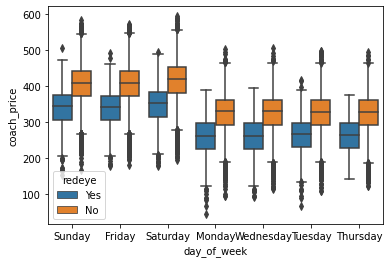

In [20]:
plt.clf()
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()